In [1]:
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *

import os

Fast (Fortran90) Mie-scattering module could not be imported. Falling back to the slower Python version.


In [2]:
#makeImage(npix=200,incl=60.,phi=30.,wav=1.3e3,sizeau=200)
#makeImage(npix=100,incl=0.,phi=0.,wav=344) 

makeImage(npix=100,incl=0.,phi=0.,wav=1300,sizeau=350,setthreads=4)   # This calls radmc3d
os.system('cp image.out image_iso.out')


Executing RADMC-3D Command:
radmc3d image npix 100 incl 0.0 sizeau 350 lambda 1300 phi 0.0 pointau 0.0  0.0  0.0 fluxcons setthreads 4


1

Reading image.out


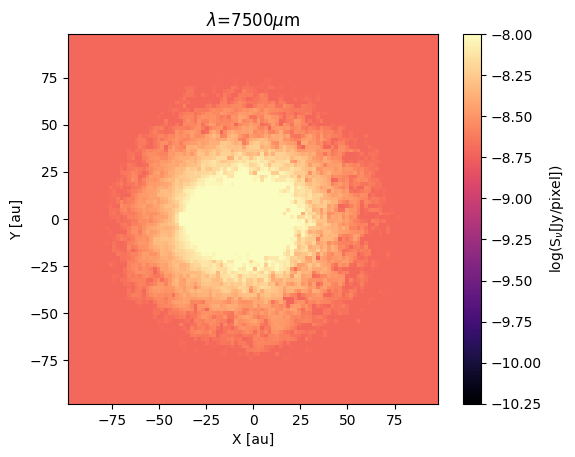

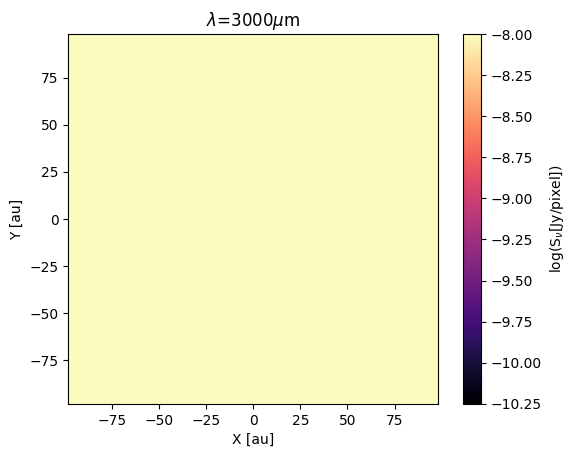

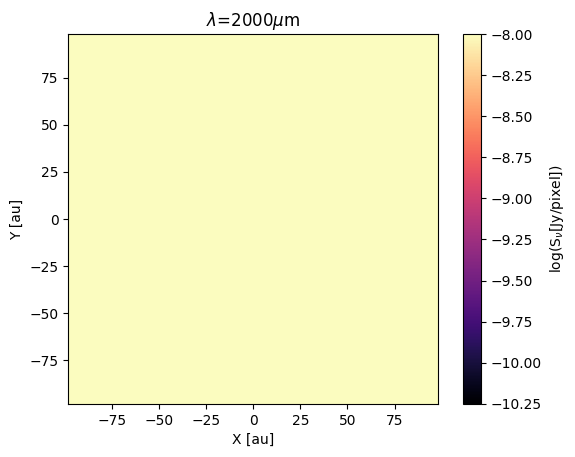

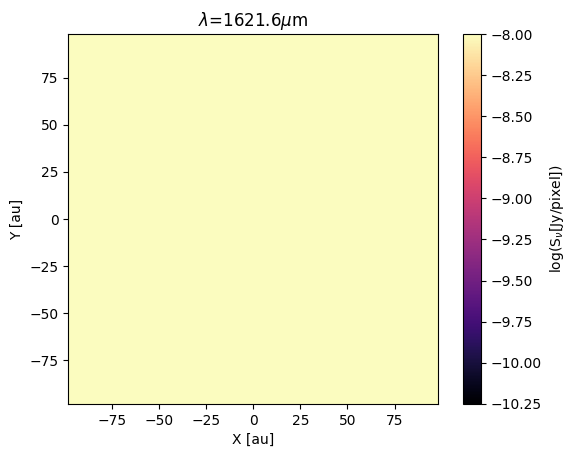

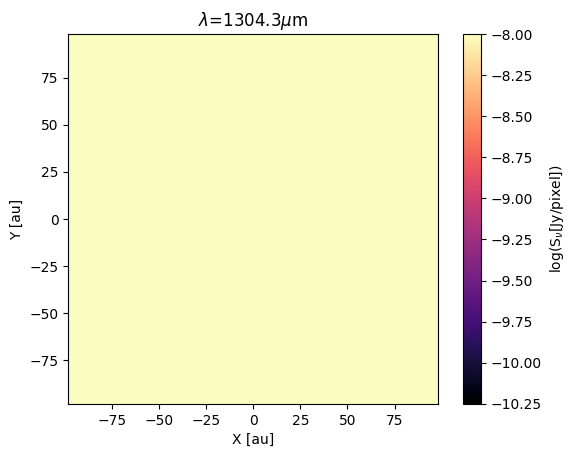

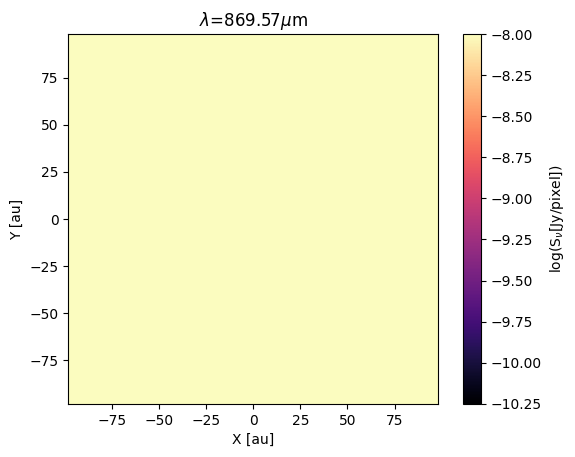

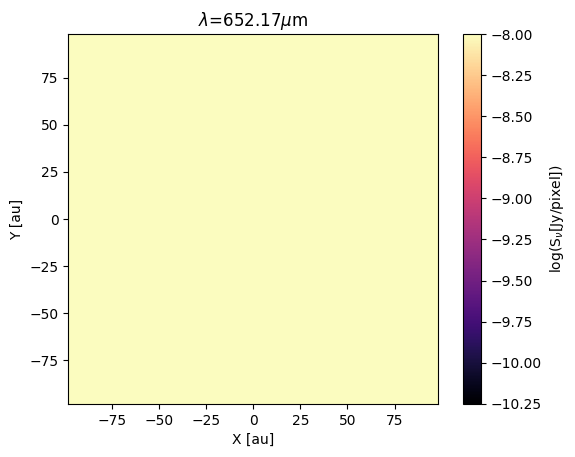

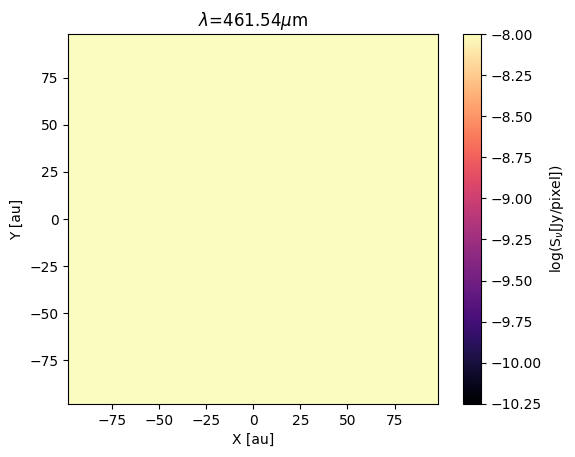

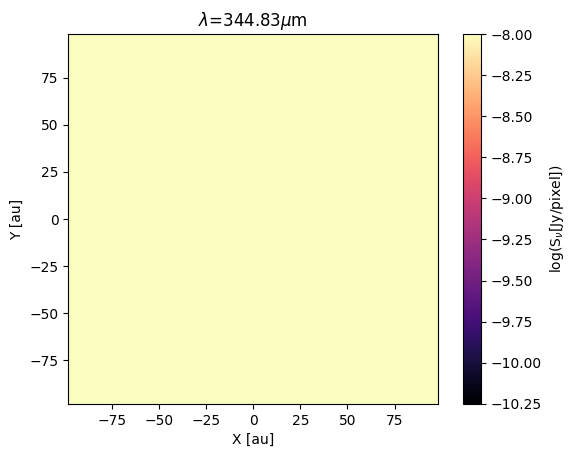

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

im_mm = readImage()
# Create a figure with subplots

# Loop through ifreq from 0 to 8
for i in range(9):
    plotImage(im_mm, au=True, ifreq=i, log=True, maxlog=3, bunit='jy/pixel', saturate = 1, dpc=100, cmap='magma', vmax= -8, vmin = -10.25)

# prob need not use plotImage, but plot image.out directly and show which band is which
# Adjust layout
plt.tight_layout()
plt.show()

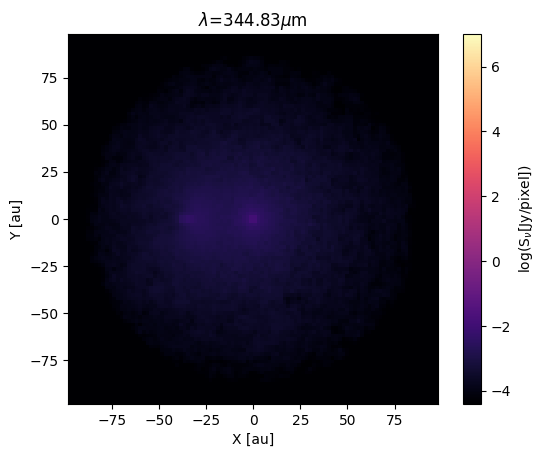

{'implot': <matplotlib.image.AxesImage at 0x1b77831dd30>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x1b7785fc440>}

In [10]:

# Band10
plotImage(im_mm, au=True, ifreq=8, log=True, maxlog=3, bunit='jy/pixel', saturate = 1, dpc=100, cmap='magma', vmax= -4, vmin = 7)

Reading image.out


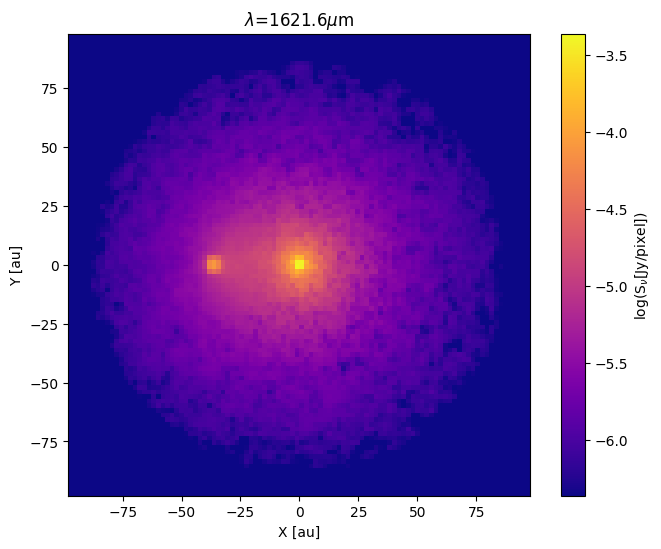

In [5]:
#check the wavelength

import matplotlib.pyplot as plt
from radmc3dPy.image import readImage, plotImage

# Load the image using radmc3dPy
im_mm = readImage()

# Create a figure
plt.figure(figsize=(8, 6))

# Plot the image for ifreq=3
plotImage(im_mm, au=True, ifreq=3, log=True, maxlog=3, bunit='jy/pixel', dpc=100, cmap='plasma')

# Show the plot
plt.show()

In [6]:
im_mm.writeFits('CPD_PPD_PDS70_1620.50.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=3)

In [26]:
im_mm.writeFits('CPD_PPD_PDS70_7494.81.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=0)
im_mm.writeFits('CPD_PPD_PDS70_2997.92.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=1)
im_mm.writeFits('CPD_PPD_PDS70_1998.62.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=2)
im_mm.writeFits('CPD_PPD_PDS70_1304.45.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=4)
im_mm.writeFits('CPD_PPD_PDS70_868.96.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=5)
im_mm.writeFits('CPD_PPD_PDS70_651.72.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=6)
im_mm.writeFits('CPD_PPD_PDS70_461.22.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=7)
im_mm.writeFits('CPD_PPD_PDS70_344.59.fits', dpc=113., coord='14h08m10s -41d23m53s', ifreq=8)


#Wavelength (micron)": [7494.81, 2997.92,1998.62, 1620.50,1304.45, 868.96, 651.72, 461.22, 344.59]

CPD_PPD_PDS70_7494.81.fits already exists
CPD_PPD_PDS70_2997.92.fits already exists


IndexError: string index out of range

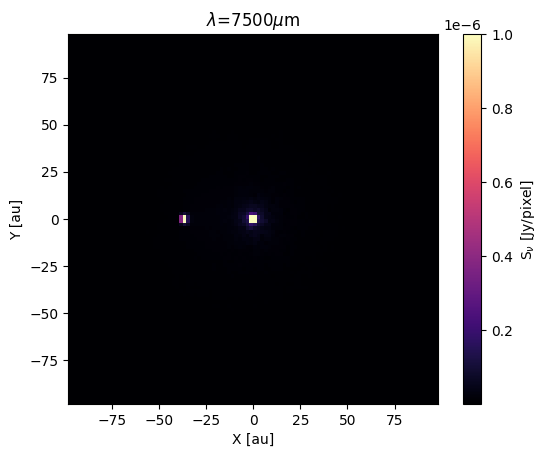

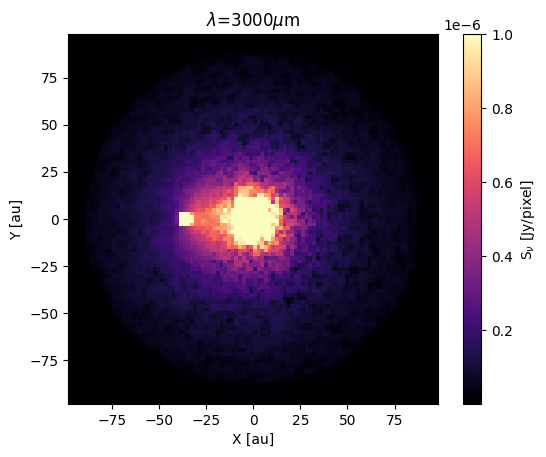

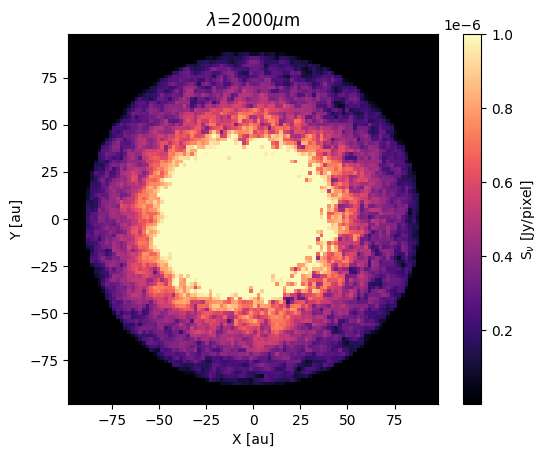

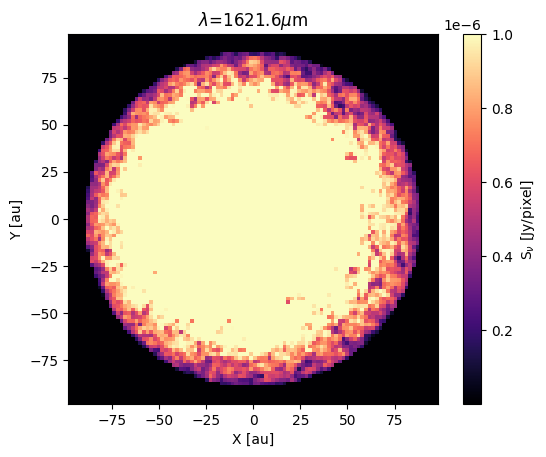

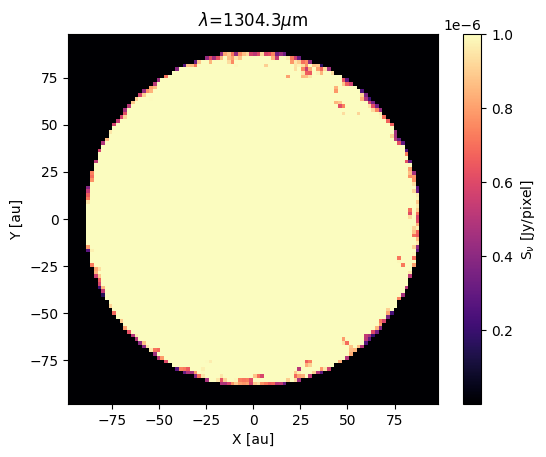

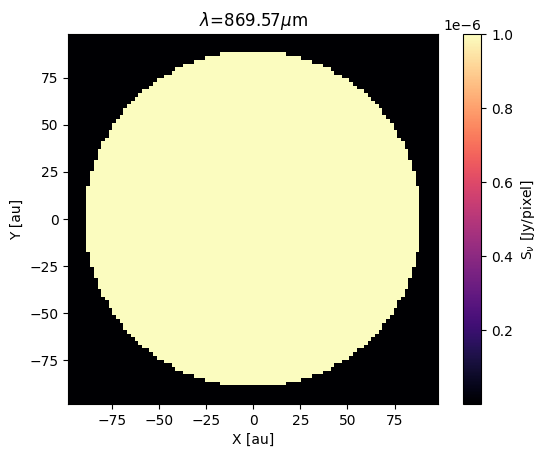

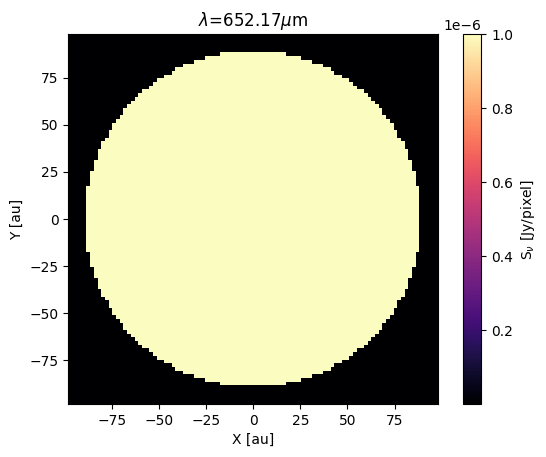

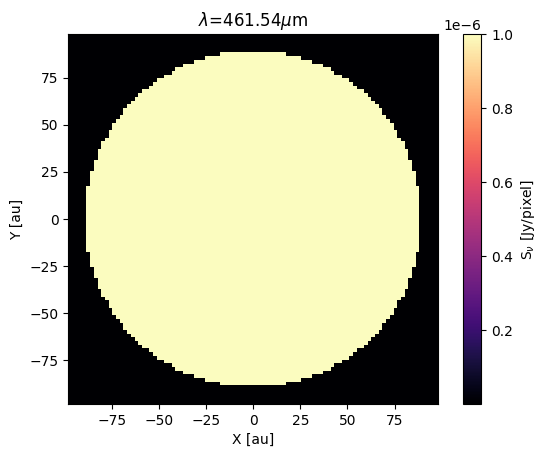

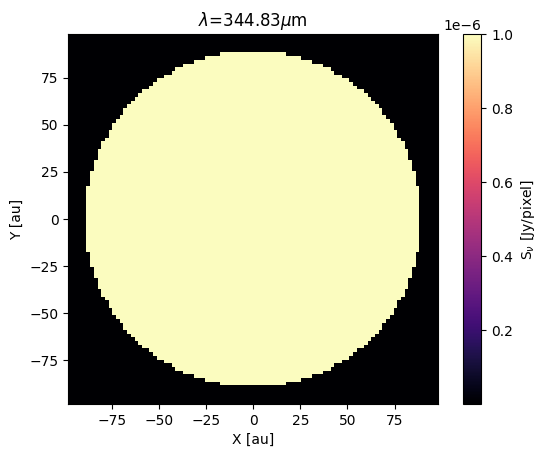

<Figure size 640x480 with 0 Axes>

In [ ]:
# Not in log

# Loop through ifreq from 0 to 8
for i in range(9):
    plotImage(im_mm, au=True, ifreq=i, bunit='jy/pixel', dpc=100, saturate = 1,cmap='magma',vmin = 0.1e-6 , vmax = 1e-6 )
    #cbar = plt.colorbar(implot)
    #cbar.set_label(cb_label)



# prob need not use plotImage, but plot image.out directly and show which band is which
# Adjust layout
plt.tight_layout()
plt.show()

<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\;'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\;'
C:\Users\LHEM\AppData\Local\Temp\ipykernel_15264\480743291.py:22: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_15264\480743291.py:23: SyntaxWarning: invalid escape sequence '\;'
  plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')


Text(0, 0.5, '$\\nu F_\\nu \\; [\\mathrm{erg}\\,\\mathrm{cm}^{-2}\\,\\mathrm{s}^{-1}]$')

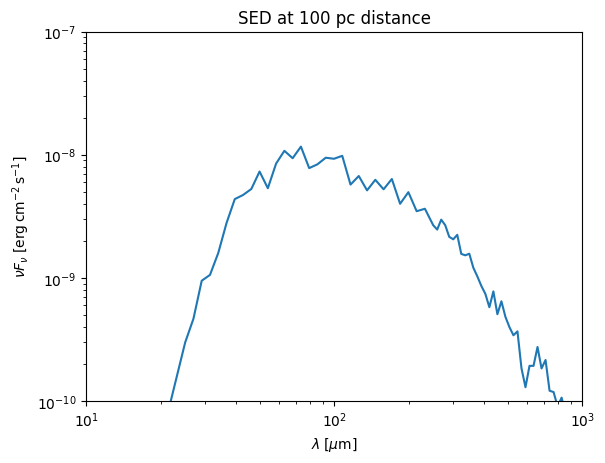

In [11]:
# Spectrum： radiation intensity vs wavelength
# SED: energy outpyt vs wavelength , can identify the components 

# Plot the spectrum of the CPD


# Make and plot the SED as seen at 1 pc distance
#
s     = readSpectrum()
lam   = s[:,0]  # Wavelength in micron
nu    = 1e4*cc/lam  # so that nu is in Hz
fnu   = s[:,1] # F_nu in ergs/cm^2/s/Hz
nufnu = nu*fnu  #y axis values in ergs/cm^2/s
plt.figure()
plt.plot(lam,nufnu)
#plt.xlim([100,1000])
plt.title('SED at 100 pc distance')
plt.xscale('log')
plt.yscale('log')
plt.axis([1e1, 1e3, 1e-10, 1e-7])

plt.xlabel('$\lambda\; [\mu \mathrm{m}$]')
plt.ylabel('$\\nu F_\\nu \; [\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$')



In [12]:
print('The emission is stronger at high frequency end, and the optical depth is also higher in high-frequency end.')

The emission is stronger at high frequency end, and the optical depth is also higher in high-frequency end.
